In [153]:
import requests
import alpha_vantage
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import pandas as pd
%"matlpotlib inline"
import talib
import scipy

ERROR:root:Line magic function `%"matlpotlib` not found.


In [2]:
def CryptoData(symbol, frequency):
    #Params: String symbol, int frequency = 300,900,1800,7200,14400,86400
    #Returns: df from first available date
    url ='https://poloniex.com/public?command=returnChartData&currencyPair='+symbol+'&end=9999999999&period='+str(frequency)+'&start=0'
    df = pd.read_json(url)
    df.set_index('date',inplace=True)
    df.index = pd.to_datetime(df.index)
    df=pd.DataFrame(df['close'])
    return df

df=CryptoData('USDT_BTC', 86400)
df


,close
date,
2015-02-19,244.000000
2015-02-20,240.250000
2015-02-21,245.000000
2015-02-22,235.000000
2015-02-23,235.000000
2015-02-24,239.750000
2015-02-25,237.750000
2015-02-26,238.500000
2015-02-27,249.000000


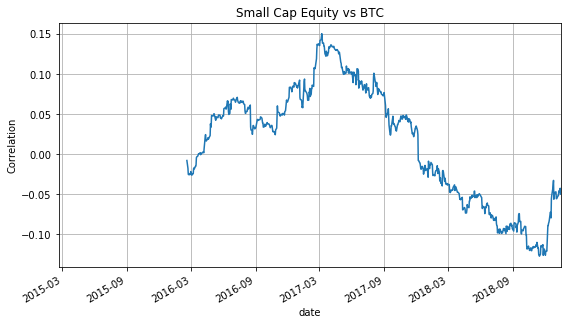

In [14]:
df2=df.join(df1,how='outer')
df2=df2.dropna()
df3=df2.pct_change()
df3=df3.dropna()
df3['close'].rolling(252).corr(df3.iloc[:,1]).plot(figsize=(9,5))


plt.ylabel('Correlation')
plt.title('Small Cap Equity vs BTC')
plt.grid(True)
plt.show()

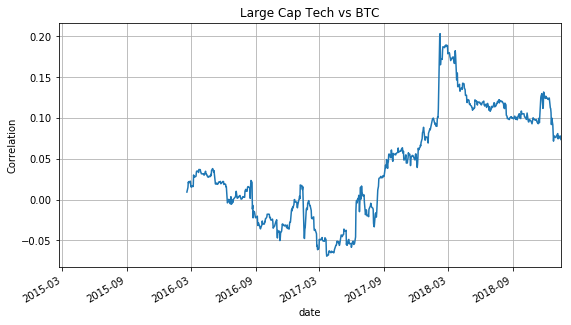

In [12]:
df2=df.join(df1,how='outer')
df2=df2.dropna()
df3=df2.pct_change()
df3=df3.dropna()
df3['close'].rolling(252).corr(df3.iloc[:,1]).plot(figsize=(9,5))


plt.ylabel('Correlation')
plt.title('Large Cap Tech vs BTC')
plt.grid(True)
plt.show()

In [53]:
df3

,close,4. close
date,,
2015-02-20,-1.536885e-02,0.006126
2015-02-23,-2.185224e-02,-0.000303
2015-02-24,2.021277e-02,0.002759
2015-02-25,-8.342023e-03,-0.000766
2015-02-26,3.154574e-03,-0.001476
2015-02-27,4.402516e-02,-0.002956
2015-03-02,8.032129e-02,0.006125
2015-03-03,-6.617100e-03,-0.004539
2015-03-04,4.782576e-02,-0.004389


In [4]:
df1

,4. close
date,
2000-07-28,75.53
2000-07-31,76.31
2000-08-01,75.56
2000-08-02,75.92
2000-08-03,75.03
2000-08-04,76.72
2000-08-07,78.20
2000-08-08,77.45
2000-08-09,77.27


In [13]:
def Stocks(ticker):
    ts = TimeSeries(key='Z7LCDQ8CWEM95QUB', output_format='pandas')
    df, meta_data = ts.get_daily(symbol=ticker, outputsize='full')
    df.index = pd.to_datetime(df.index)
    df=pd.DataFrame(df.iloc[:,3])
    return df
df1=Stocks('GLD')


In [2]:
class AlphaVantage:
    
    def __init__(self, symbol_code, interval="60min", outputsize="compact"):
        self.base_url = "https://www.alphavantage.co"
        self.default_endpoint = "/query"
        self.api_key = "Z7LCDQ8CWEM95QUB"
        self.symbol_code = symbol_code
        self.interval = interval
        self.outputsize = outputsize
        
    def intraday(self):
        parameters = {
            "function": "TIME_SERIES_INTRADAY",
            "symbol": self.symbol_code,
            "interval": self.interval,
            "outputsize": self.outputsize,
            "datatype": "json",
            "apikey": self.api_key
        }

        response_intraday = requests.get("{0}{1}".format(self.base_url, self.default_endpoint), params=parameters, stream=True).json()

        return response_intraday
    
    def daily(self):
        parameters = {
            "function": "TIME_SERIES_DAILY",
            "symbol": self.symbol_code,
            "outputsize": self.outputsize,
            "datatype": "json",
            "apikey": self.api_key
        }

        response_daily = requests.get("{0}{1}".format(self.base_url, self.default_endpoint), params=parameters, stream=True).json()

        return response_daily

In [3]:

from get_historical_data import AlphaVantage
import pandas as pd
import json


def get_main_data_frame(symbol):
    #
    # Get historical data as json
    #
    #AlphaVantage(symbol).daily()
    historical_daily_data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
    
    list_keys = []
    list_historical_data__daily = []
    for key in historical_data_daily['Time Series (Daily)']:
        list_keys.append(key)

    for k in list_keys:
        #
        # Extract relevant data from original historical data response
        #
        data = historical_data_daily['Time Series (Daily)'][k]

        price_open = data['1. open']
        price_high = data['2. high']
        price_low = data['3. low']
        price_close = data['4. close']

        dict_data = dict([
            (u'date', k),
            (u'symbol', symbol),
            (u'price_open', price_open),
            (u'price_high', price_high),
            (u'price_low', price_low),
            (u'price_close', price_close),
        ])

        list_historical_data__daily.append(dict_data)
        
        # convert data to data frame
    #
    df = pd.read_json(json.dumps(list_historical_data__daily))

    #
    # prepare data, and add calculated fields to data frame
    #
    df['date_str'] = df['date']
    df.set_index('date', inplace=True)
    df.sort_index(inplace=True)

    df['price_close_lag'] = df['price_close'].shift(1)
    df['price_close_lead'] = df['price_close'].shift(-1)

    df.insert(0, 'date_id', range(1, 1 + len(df)))

    #
    # returns data frame
    # 
    return df


ModuleNotFoundError: No module named 'get_historical_data'

In [190]:
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import json
from pandas.io.json import json_normalize

def FX(symbol,window):
    style.use('fivethirtyeight')
    api_key="Z7LCDQ8CWEM95QUB"
    data_type="FX_DAILY"
    data=requests.get('https://www.alphavantage.co/query?function='+data_type+'&from_symbol='+symbol[:3]+'&to_symbol='+symbol[3:]+'&outputsize=full&apikey={}'.format(api_key))
    data=data.json()
    data=data['Time Series FX (Daily)']
    
    #df=pd.DataFrame(columns=['date','open','high','low','close'])
    df=pd.DataFrame(columns=['date',symbol])
    for d,p in data.items():
        date=datetime.datetime.strptime(d,'%Y-%m-%d')
        #data_row=[date,float(p['1. open']),float(p['2. high']),float(p['3. low']),float(p['4. close'])]
        data_row=[date,float(p['4. close'])]
        df.loc[-1,:]=data_row
        df.index=df.index+1
    data=df.sort_values('date')
    
    data[symbol+'_change']=data[symbol].pct_change()
    data['RSI']=talib.RSI(data[symbol], timeperiod=window)
    #data=df.sort_values('date', ascending=False)
    
    data.index=data['date']
    data=data.drop(['date'],axis=1)
    data=data.dropna()
    return data
 

symbols=['EURUSD','GBPUSD','USDJPY','AUDUSD','USDZAR']
def data_pit(window):
    dicts={}
    keys = symbols
    values = []
    for i in symbols:
        values.append(FX(i,window))
    for x,i in enumerate(keys):
        dicts[i] = values[x]
    return dicts
data=data_pit(14)

In [187]:
FX('USDEUR',14).tail()

,USDEUR,USDEUR_change,RSI
date,,,
2019-01-15,0.8765,0.005391,52.068991
2019-01-16,0.8773,0.000913,53.073497
2019-01-17,0.878,0.000798,53.982267
2019-01-18,0.8797,0.001936,56.200662
2019-01-19,0.8797,0.000000,56.200662


In [191]:
data

{'AUDUSD':             AUDUSD  AUDUSD_change        RSI
 date                                        
 2000-12-01  0.5365       0.017062  64.102564
 2000-12-04  0.5439       0.013793  68.674699
 2000-12-05  0.5405      -0.006251  64.603313
 2000-12-06   0.547       0.012026  68.453768
 2000-12-07   0.547       0.000000  68.453768
 2000-12-08  0.5451      -0.003473  66.019160
 2000-12-11  0.5411      -0.007338  61.092940
 2000-12-12   0.541      -0.000185  60.970453
 2000-12-13  0.5383      -0.004991  57.611861
 2000-12-14  0.5411       0.005202  60.068453
 2000-12-15  0.5435       0.004435  62.096180
 2000-12-18  0.5411      -0.004416  58.876448
 2000-12-19  0.5449       0.007023  62.216930
 2000-12-20  0.5495       0.008442  65.834862
 2000-12-21  0.5545       0.009099  69.278394
 2000-12-22   0.557       0.004509  70.859885
 2000-12-25  0.5565      -0.000898  70.082835
 2000-12-26   0.559       0.004492  71.750882
 2000-12-27  0.5593       0.000537  71.952970
 2000-12-28   0.554     

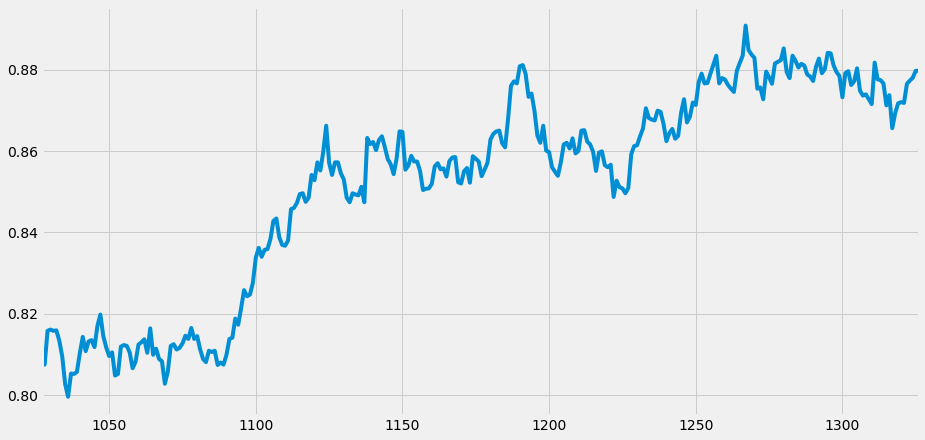

In [188]:
retrieve_data(data,'USDEUR')['USDEUR'].tail(300).plot(figsize=(14,7))
plt.show()

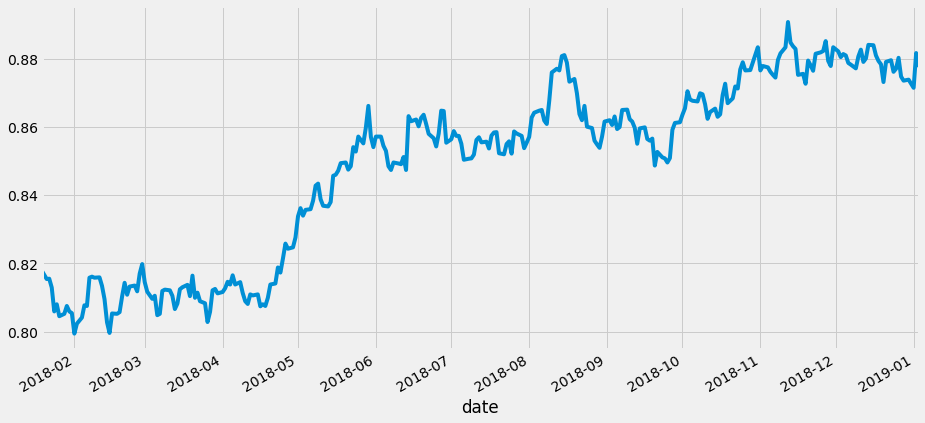

In [162]:
retrieve_data(data,'USDEUR')['USDEUR'].tail(300).plot(figsize=(14,7))
plt.show()

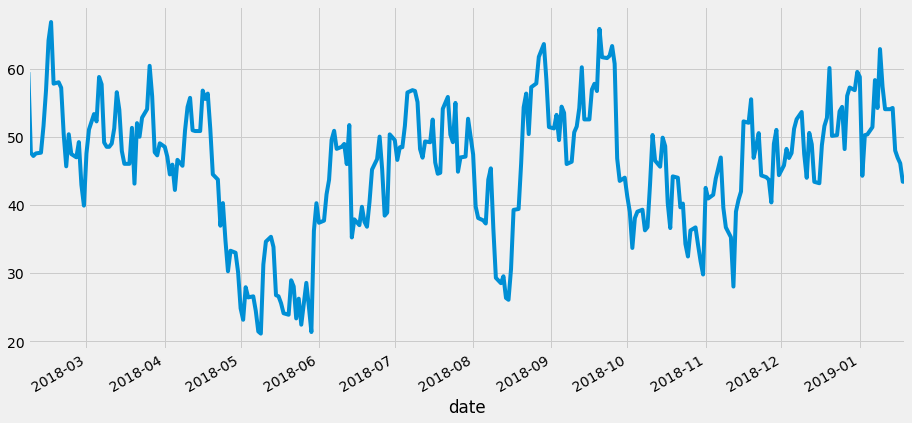

In [193]:
retrieve_data(data,'EURUSD')['RSI'].tail(300).plot(figsize=(14,7))
plt.show()

In [194]:
def retrieve_data(df,symbol):
    df1=df[symbol]
    df1=df1.sort_index(ascending=True)
    return df1

def set_period(df,date): 
    df=df[df.index>date]
    return df

def decline(data,symbol, RSI_min):
    df=retrieve_data(data,symbol)
    df_decline=df[df['RSI']<RSI_min]
    return df_decline

def rise(data,symbol, RSI_max):
    df=retrieve_data(data,symbol)
    df_rise=df[df['RSI']>RSI_max]
    return df_rise


def dates_v2(date,df):
    list0=[]
    for i in df.index:
        list0.append(i-date)
    list0=pd.DataFrame(list0)
    list0.columns=['dates']
    list0=list0[list0>0]
    list0=list0.dropna()
    list0.sort_values(by=['dates'])
    return list0.iloc[0,:]


def time_diff(data,symbol,RSI_min,RSI_max,direction):
    time=[]
    fall=decline(data,symbol,RSI_min)
    ascent=rise(data,symbol,RSI_max)
    zero=np.zeros(1,)
    if len(ascent)<1:
        ascent
    if direction=='long':
        if len(ascent)>0:
            fall=fall.ix[fall.index<ascent.index[-1]]
            for x in range (len(fall)):
                time.append(dates_v2(fall.index[x],ascent))
    else:
        if len(fall)>0:
            ascent=ascent.ix[ascent.index<fall.index[-1]]
            for i in range (len(ascent)):
                time.append(dates_v2(ascent.index[i],fall))
    return time

def retrieve_dates(event_dates,time_diff):
    
    dates=[]
    time=[]
 
    List=[dates,time]
    for x,y in zip(event_dates,time_diff):
        dates.append(x)
        time.append(y)
        
    List=pd.DataFrame(List)
    List=List.transpose()
    List.columns=['entry_date','time']
    new_time=[]
    for i in range(len(List)):
        new_time.append(List['time'][i][0])
    List['time_shift']=new_time
    List=List.drop(['time'],axis=1)
    exit=[]
    for x,y in zip(List['time_shift'],List['entry_date']):
        exit.append(x+y)
    List['exit_date']=exit
    List.index=List['entry_date']
    List=List.drop(['entry_date'],axis=1)
    return List


df=retrieve_dates(rise(data,"EURUSD",60).index, time_diff(data,'EURUSD',40,60,'short'))
df1=set_period(df,'2018-01-01 00:00:00')
df1


,time_shift,exit_date
entry_date,,
2018-01-02,57 days,2018-02-28
2018-01-03,56 days,2018-02-28
2018-01-04,55 days,2018-02-28
2018-01-05,54 days,2018-02-28
2018-01-07,52 days,2018-02-28
2018-01-11,48 days,2018-02-28
2018-01-12,47 days,2018-02-28
2018-01-14,45 days,2018-02-28
2018-01-15,44 days,2018-02-28


In [196]:
rise(data,"EURUSD",60).tail()

,EURUSD,EURUSD_change,RSI
date,,,
2018-09-24,1.175,0.000341,61.934574
2018-09-25,1.1766,0.001362,63.360658
2018-09-26,1.1749,-0.001445,60.756194
2018-12-20,1.1448,0.005975,60.133548
2019-01-09,1.1548,0.009441,62.910127


In [199]:
def RSI_test(data,symbol,RSI_min,RSI_max,period,direction):
    if direction =='long':
        df=retrieve_dates(decline(data,symbol,RSI_min).index, time_diff(data,symbol,RSI_min,RSI_max,direction))
    else:
        df=retrieve_dates(rise(data,symbol,RSI_max).index, time_diff(data,symbol,RSI_min,RSI_max,direction))
    
    if len(df) >0:
        df=set_period(df,period)
    
    entry_price=[]
    for i in df.index:
        entry_price.append(retrieve_data(data,symbol).loc[i][symbol])
    exit_price=[]
    for x in df['exit_date']:
        exit_price.append(retrieve_data(data,symbol).loc[x][symbol])
    List=[entry_price,exit_price]
    List=pd.DataFrame(List)
    List=List.transpose()
    List.columns=['entry','exit']
    List.index=df.index
    List['returns']=(List['exit']/List['entry'])-1
    time_shift=[]
    for x in df['time_shift']:
        time_shift.append(x)
    List['duration']=time_shift
    
    if direction=='long':
        List['returns']=List['returns']
    else:
        List['returns']=List['returns']*-1
    
    List['cumulative_returns']=List['returns'].cumsum()
    return List

RSI_test(data,'EURUSD',35,60,'2018-01-01 00:00:00','long')

,entry,exit,returns,duration,cumulative_returns
entry_date,,,,,
2018-04-25,1.2169,1.1680,-0.040184,124 days,-0.040184
2018-04-26,1.2104,1.1680,-0.035030,123 days,-0.075214
2018-04-27,1.2125,1.1680,-0.036701,122 days,-0.111915
2018-04-29,1.2121,1.1680,-0.036383,120 days,-0.148298
2018-04-30,1.2081,1.1680,-0.033193,119 days,-0.181491
2018-05-01,1.1989,1.1680,-0.025774,118 days,-0.207264
2018-05-02,1.1954,1.1680,-0.022921,117 days,-0.230185
2018-05-03,1.1986,1.1680,-0.025530,116 days,-0.255715
2018-05-04,1.1959,1.1680,-0.023330,115 days,-0.279045


In [204]:
def RSI_test_update(data,symbol,RSI_min,RSI_max,period,direction):
    
    if direction =='long':
        df=retrieve_dates(decline(data,symbol,RSI_min).index, time_diff(data,symbol,RSI_min,RSI_max,direction))
    else:
        df=retrieve_dates(rise(data,symbol,RSI_max).index, time_diff(data,symbol,RSI_min,RSI_max,direction))
    
    
    if len(df) >0:
        df=set_period(df,period)
    pos=1
    capital=1000
    n=10
    entry_date=[]
    exit_date=[]
    time_shift=[]
    
    entry_price=[]
    exit_price=[]
    returns=[]
    cash=[capital]
    PnL=[]
    positions=[pos]
    early_dates=[]
    
    for index,row in df.iterrows():
        if 1==1:#cash[-1]>capital/n:
            entry_date.append(index)
            exit_date.append(row[1])
            time_shift.append(row[0])
            
            
            entry__price=retrieve_data(data,symbol).loc[index][symbol]
            exit__price=retrieve_data(data,symbol).loc[row[1]][symbol]
            ret=(exit__price/entry__price)-1
            
           
            profit=(capital/n)*ret
            if direction=='long':
                profit=profit
            else:
                profit=profit*-1
            
            
            if len(entry_date)>=2:
                if entry_date[-1]<exit_date[-2]:
                    early_dates.append(entry_date[-1])
                
            updated_cash=cash[-1]
                   
            
            if index in early_dates:
                updated_cash=updated_cash-capital/n
            else:
                updated_cash=updated_cash+profit
            
            
            if len(entry_date)>=2:
                if entry_date[-1]>exit_date[-2]:
                    pos=1
                else:
                    pos=pos+1
            
            if len(entry_date)>=2:
                if positions[-1]>=2:
                    if entry_date[-1]>exit_date[-2]:
                        updated_cash=updated_cash+(capital/n)*(positions[-1]-1)+sum(PnL[-positions[-1]+1:])
            
            
            positions.append(pos)
            entry_price.append(entry__price)
            exit_price.append(exit__price)
            returns.append(ret)
            PnL.append(profit)
            
            cash.append(updated_cash)
            
    cash=cash[1:len(cash)]
    positions=positions[1:len(positions)] 
    List=[entry_date,exit_date,entry_price,exit_price,time_shift,returns,cash,PnL]
    col= ['entry_date','exit_date','entry_price','exit_price','duration','returns','capital','PnL']
    List=pd.DataFrame(List)
    List=List.transpose()
    List.columns=col
    List.index=List['entry_date']
    List=List.drop(['entry_date'],axis=1)
    
    List['cumulative_PnL']=List['PnL'].cumsum()
    List['positions']=positions
   # List=List.dropna()
    if direction=='long':
        List['returns']=List['returns']
    else:
        List['returns']=List['returns']*-1
    
    trades=[]
    for x in range(len(List['exit_price'])):
        trades.append(len(List.exit_price[0:x].unique()))
    List['trades']=trades
    zero=np.zeros((1, 10))

    if len(List)<1:
        List=pd.DataFrame(zero,columns=List.columns)
        
    return List

RSI_test_update(data,'EURUSD',35,65,'2010-01-01 00:00:00','short')

,exit_date,entry_price,exit_price,duration,returns,capital,PnL,cumulative_PnL,positions,trades
entry_date,,,,,,,,,,
2010-07-15,2010-11-24 00:00:00,1.2934,1.3332,132 days 00:00:00,-0.0307716,996.923,-3.07716,-3.07716,1,0
2010-07-16,2010-11-24 00:00:00,1.2929,1.3332,131 days 00:00:00,-0.0311702,896.923,-3.11702,-6.19418,2,1
2010-07-19,2010-11-24 00:00:00,1.2948,1.3332,128 days 00:00:00,-0.0296571,796.923,-2.96571,-9.15989,3,1
2010-07-20,2010-11-24 00:00:00,1.289,1.3332,127 days 00:00:00,-0.0342901,696.923,-3.42901,-12.5889,4,1
2010-07-26,2010-11-24 00:00:00,1.2987,1.3332,121 days 00:00:00,-0.026565,596.923,-2.6565,-15.2454,5,1
2010-07-27,2010-11-24 00:00:00,1.3,1.3332,120 days 00:00:00,-0.0255385,496.923,-2.55385,-17.7993,6,1
2010-07-28,2010-11-24 00:00:00,1.2987,1.3332,119 days 00:00:00,-0.026565,396.923,-2.6565,-20.4558,7,1
2010-07-29,2010-11-24 00:00:00,1.3081,1.3332,118 days 00:00:00,-0.0191881,296.923,-1.91881,-22.3746,8,1
2010-07-30,2010-11-24 00:00:00,1.305,1.3332,117 days 00:00:00,-0.0216092,196.923,-2.16092,-24.5355,9,1
